In [ ]:
############**********************************//////
## Course no: CRP 556
## FinalProject
## Submitted by: Fatema Nourin
## ISU NetID: fnourin
## email:fnourin@iastate.edu
## Date: 12/13/2021
## Codes are Modified from Dr. Wu's example

In [3]:
# !    conda install geemap -c conda-forge
#conda activate gee
#jupyter notebook

import ee
import geemap
import os

In [4]:
##geemap.update_package()        ##in case need to update the package

In [5]:
###*******The first Global Map showing The Global NDVI Distribution
#********* The Following lines have to run through miniconda prom to make sure the pACKAGES ARE INSTALLED PROPERLY

#conda create -n carto python=3.8
#conda activate carto
#conda install mamba -c conda-forge
#mamba install cartopy scipy -c conda-forge
#mamba install geemap -c conda-forge
#jupyter notebook



from geemap import cartoee
import cartopy.crs as ccrs

%pylab inline


Map = geemap.Map()

image = ee.ImageCollection('MODIS/MCD43A4_006_NDVI') \
                  .filter(ee.Filter.date('2017-04-01', '2017-05-01')) \
                  .select("NDVI")\
                  .first()

vis_params = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}
Map.setCenter(-7.03125, 31.0529339857, 2)
Map.addLayer(image, vis_params, 'MODIS NDVI')

countries = ee.FeatureCollection('users/giswqs/public/countries')
style = {
    "color": "00000088",
    "width": 1,
    "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")

ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))

Map.addLayer(blend, {}, "Blend")

Map

Populating the interactive namespace from numpy and matplotlib


Map(center=[31.0529339857, -7.03125], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=H…

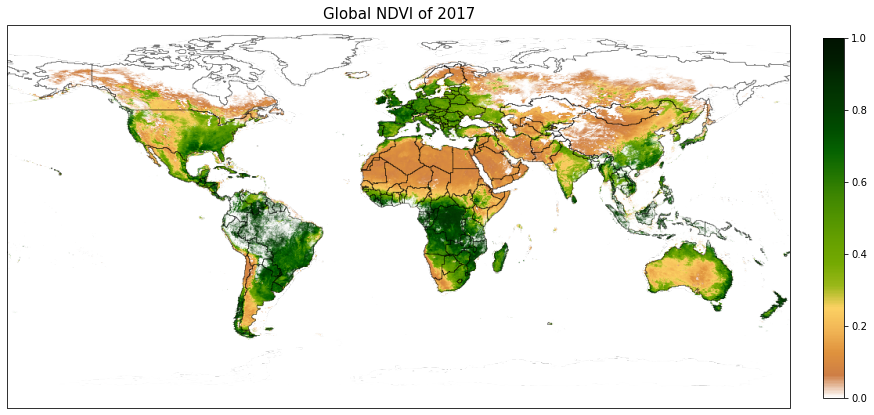

In [6]:

# specifyind the bounding geometry 
bbox = [-180, -88, 180, 88] ## For zooming into a specific location, we can change the bounding box coordinates

fig = plt.figure(figsize=(15,10))

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend,  region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')

ax.set_title(label='Global NDVI of 2017', fontsize = 15)

# ax.coastlines()
plt.show()

In [8]:
Map = geemap.Map(center = (42, -94), zoom = 7)
##adding basemaps
Map.basemap_demo()
#Map.add_legend()##Adding the default legend
Map

Map(center=[42, -94], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(To…

In [9]:
directory = 'C:/Users/fnourin/Box/Fall2021/crp 556/FinalProj'

In [10]:
##Incase geemap.shp_to_ee does not work, on the conde prompt, #activate gee # conda install -c conda-forge pyshp
area_path = 'iowa_border.shp'
area_shp = os.path.join(directory,area_path)##Shapefile from local drive
boundary = geemap.shp_to_ee(area_shp)     ##converting the shapefile into earth engine object
Map.addLayer(boundary, {}, 'boundary')

In [11]:
city_path = 'incorporated_cities_2010.shp'
city_shp = os.path.join(directory,city_path)##Shapefile from local drive
cities = geemap.shp_to_ee(city_shp)     ##converting the shapefile into earth engine object
Map.addLayer(cities, {}, 'cities')

In [12]:
##Creating Landsat TimeLaps
## Creating the ROI from the Iowa State Boundary shapefile
roi = boundary
##Now creating an landsat image collection
collection = geemap.landsat_timeseries(roi = roi, start_year=1984, end_year = 2020, start_date ='06-10', end_date='09-20')
print(collection.size().getInfo())

first_image = collection.first()

vis = {
    'bands': ['Red', 'Green', 'Blue'],
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1]
}

Map.addLayer(first_image, vis, 'First image')

# Define arguments for animation function parameters.
video_args = {
  'dimensions': 768,
  'region': roi,
  'framesPerSecond': 5,    ####change it into even a smaller number if a slower animation is needed 
  'bands': ['Red', 'Green', 'Blue'],
  'min': 0,
  'max': 4000,
  'gamma': [1, 1, 1]
}

work_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(work_dir):
    os.makedirs(work_dir)
out_gif = os.path.join(work_dir, "landsat_ts.gif")
geemap.download_ee_video(collection, video_args, out_gif)


###adding animated text to the video
geemap.show_image(out_gif)
texted_gif = os.path.join(work_dir, "landsat_ts_text.gif")
geemap.add_text_to_gif(out_gif, texted_gif, xy=('3%', '5%'), text_sequence=1985, font_size=30, font_color='#ffffff', add_progress_bar=False)

label = 'Changes in Iowa Over the Time'
geemap.add_text_to_gif(texted_gif, texted_gif, xy=('2%', '88%'), text_sequence=label, font_size=30, font_color='#ffffff', progress_bar_color='cyan')
geemap.show_image(texted_gif)


###This ROI for entire Iowa Is Too Big, In the next section doing the same thing, but by changing the ROI into a smaller area

37
Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\fnourin\Downloads\landsat_ts.gif


Output()

Output()

In [14]:
##*******Before running this cell, draw a polygon on your interactive map
roi = Map.draw_last_feature   ###Created the ROI from Drawing a polygon around Des Moines

#Now creating an landsat image collection
collection = geemap.landsat_timeseries(roi = roi, start_year=1984, end_year = 2020, start_date ='06-10', end_date='09-20')
print(collection.size().getInfo())

first_image = collection.first()

vis = {
    'bands': ['Red', 'Green', 'Blue'],
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1]
}

Map.addLayer(first_image, vis, 'First image')

# Define arguments for animation function parameters.
video_args = {
  'dimensions': 768,
  'region': roi,
  'framesPerSecond': 5,    ####change it into even a smaller number if a slower animation is needed 
  'bands': ['Red', 'Green', 'Blue'],
  'min': 0,
  'max': 4000,
  'gamma': [1, 1, 1]
}

work_dir = os.path.join(os.path.expanduser("~"), 'Downloads')
if not os.path.exists(work_dir):
    os.makedirs(work_dir)
out_gif = os.path.join(work_dir, "landsat_ts.gif")
geemap.download_ee_video(collection, video_args, out_gif)


###adding animated text to the video
geemap.show_image(out_gif)
texted_gif = os.path.join(work_dir, "landsat_ts_text.gif")
geemap.add_text_to_gif(out_gif, texted_gif, xy=('3%', '5%'), text_sequence=1985, font_size=30, font_color='#ffffff', add_progress_bar=False)

label = 'Changes in Around Des Moines Over the Time'
geemap.add_text_to_gif(texted_gif, texted_gif, xy=('2%', '88%'), text_sequence=label, font_size=30, font_color='#ffffff', progress_bar_color='cyan')
geemap.show_image(texted_gif)
    

37
Generating URL...
Please wait ...
The GIF image has been saved to: C:\Users\fnourin\Downloads\landsat_ts.gif


Output()

Output()

In [15]:
###Converting Earth Engine Javascrpt to Python Script

from geemap.conversion import *

# Create a temporary working directory
#work_dir = os.path.join(os.path.expanduser('~'), 'geemap')
# Change js_dir to your own folder containing your Earth Engine JavaScripts, 
# such as js_dir = '/path/to/your/js/folder'
js_dir = "C:/Users/fnourin/earthengine-api/javascript/src/examples/" 

# Convert all Earth Engine JavaScripts in a folder recursively to Python scripts.
js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))


## Covert python script to jupyter notebook

Converting Earth Engine JavaScripts to Python scripts...

Processing 1/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Arrays\DecorrelationStretch.js
Processing 2/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Arrays\LinearRegression.js
Processing 3/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Arrays\QualityMosaic.js
Processing 4/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Arrays\SpectralUnmixing.js
Processing 5/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Charts\ColumnHistogram.js
Processing 6/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Charts\DoySeries.js
Processing 7/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Charts\ElevationAndTemperature.js
Processing 8/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Charts\ElevationHistogram.js
Processing 9/79: C:\Users\fnourin\earthengine-api\javascript\src\examples\Charts\ElevationProfile.js
Processing 10/79: C:\Users\fnou

ValueError: substring not found

In [16]:
import ee 
from ee import*

In [24]:

# NormalizedDifference example.
#
# Compute Normalized Difference Vegetation Index over MOD09GA product.
# NDVI = (NIR - RED) / (NIR + RED), where
# RED is sur_refl_b01, 620-670nm
# NIR is sur_refl_b02, 841-876nm

# Load a MODIS image.
img = ee.Image('MODIS/006/MOD09GA/2010_04_09')

# Use the normalizedDifference(A, B) to compute (A - B) / (A + B)
ndvi = img.normalizedDifference(['sur_refl_b02', 'sur_refl_b01'])

# Make a palette: a list of hex strings.
palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']

# Center the map
Map.setCenter(-94, 42, 7)

# Display the input image and the NDVI derived from it.
Map.addLayer(img.select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03']),
         {'gain': [0.1, 0.1, 0.1]}, 'MODIS bands 1/4/3')
Map.addLayer(ndvi, {'min': 0, 'max': 1, 'palette': palette}, 'NDVI10')


In [25]:

# NormalizedDifference example for another year.
#
# Compute Normalized Difference Vegetation Index over MOD09GA product.
# NDVI = (NIR - RED) / (NIR + RED), where
# RED is sur_refl_b01, 620-670nm
# NIR is sur_refl_b02, 841-876nm

# Load a MODIS image.
img17 = ee.Image('MODIS/006/MOD09GA/2017_05_09')

# Use the normalizedDifference(A, B) to compute (A - B) / (A + B)
ndvi17 = img17.normalizedDifference(['sur_refl_b02', 'sur_refl_b01'])

# Make a palette: a list of hex strings.
palette = ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718',
               '74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']

# Center the map
Map.setCenter(-94, 42, 7)

# Display the input image and the NDVI derived from it.
Map.addLayer(img17.select(['sur_refl_b01', 'sur_refl_b04', 'sur_refl_b03']),
         {'gain': [0.1, 0.1, 0.1]}, 'MODIS bands17 1/4/3')
Map.addLayer(ndvi17, {'min': 0, 'max': 1, 'palette': palette}, 'NDVI17')

In [26]:
##Now creating a split panel map for side by side comparision
Map = geemap.Map()
Map.split_map(left_layer='HYBRID', right_layer='ROADMAP')
Map


Map(center=[40, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [27]:
nlcd_2001 = ee.Image('USGS/NLCD/NLCD2001').select('landcover')
nlcd_2016 = ee.Image('USGS/NLCD/NLCD2016').select('landcover')

left_layer = geemap.ee_tile_layer(nlcd_2001, {}, 'NLCD 2001')
right_layer = geemap.ee_tile_layer(nlcd_2016, {}, 'NLCD 2016')

Map = geemap.Map(center = (42, -94), zoom = 8)
#Map = geemap.Map()
Map.split_map(left_layer, right_layer)
Map.addLayer(cities, {}, 'cities') ##The cities layer goes underneath or opens in a separate map
Map.add_legend(builtin_legend='NLCD')##Adding the default legend
Map

Map(center=[42, -94], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [28]:
dataset = ee.Image('USGS/NLCD/NLCD2016')
landcover = ee.Image(dataset.select('landcover'))
Map.addLayer(landcover, {}, 'NLCD 2016')

boundary = boundary ##The shapefile that we used from the local drive to Google earth Engine
Map.addLayer(boundary, {}, 'Iowa Boundary')

out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
nlcd_stats = os.path.join(out_dir, 'nlcd_stats.csv')  

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
# statistics_type can be either 'SUM' or 'PERCENTAGE' here used the same of Area
#Class Number means each Class type from the Legend.
##The are is in sqaure meters
geemap.zonal_statistics_by_group(landcover, boundary, nlcd_stats, statistics_type='SUM', denominator=1000000, decimal_places=2)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to C:\Users\fnourin\Downloads\nlcd_stats.csv


In [89]:
##Zonal STattistics of the other NLCD Data of 2001
dataset = ee.Image('USGS/NLCD/NLCD2011')
landcover = ee.Image(dataset.select('landcover'))
Map.addLayer(landcover, {}, 'NLCD 2001')

boundary = boundary ##The shapefile that we used from the local drive to Google earth Engine
Map.addLayer(boundary, {}, 'Iowa Boundary')

out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
nlcd_stats01 = os.path.join(out_dir, 'nlcd_stats01.csv')  

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
# statistics_type can be either 'SUM' or 'PERCENTAGE' here used the same of Area
#Class Number means each Class type from the Legend.
##The are is in sqaure meters
geemap.zonal_statistics_by_group(landcover, boundary, nlcd_stats01, statistics_type='SUM', denominator=1000000, decimal_places=2)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to C:\Users\fnourin\Downloads\nlcd_stats01.csv


In [22]:
####**** Now Plotting the NLCD Values*****#######

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#directory = directory   ### Using the same directory as the previous
directory = "C:/Users/fnourin/Box/Fall2021/crp 556/FinalProj/"

df = pd.read_excel(directory + "Format.xlsx")

df.columns = ["Variables", "2016", "2001"]

df.loc[: , "Change in percentage"] = np.round((df["2016"] - df["2001"])/df["2001"] * 100, 2)
df

,Variables,2016,2001,Change in percentage
0,Pasture (sq m),17870.32,18708.00,-4.48
1,Grassland,1935.72,1974.62,-1.97
2,Cultivated Crops,106094.53,105346.55,0.71
3,Emergent Herbaceous Wetlands,891.91,772.64,15.44
4,Deciduous Forest,9086.82,9075.11,0.13
5,Shrub,25.41,23.31,9.01
6,Barren Land,105.75,78.65,34.46
7,Evergreen Forest,75.22,73.95,1.72
8,Developed Open Space,3327.72,3334.30,-0.20
9,Mixed Forest,928.54,914.25,1.56


Text(0.5, 1.0, 'Change in percentage from 2001 to 2016')

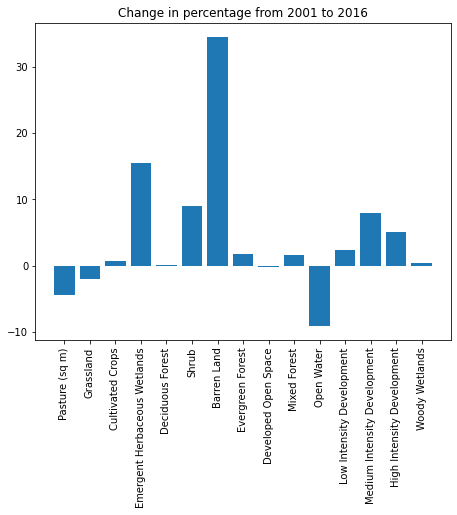

In [23]:
##Now Plotting the data from the dataframe
%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize = (6.5, 5))

fig.tight_layout()

axes.bar(df.iloc[:-1, 0], df.iloc[:-1, -1])
axes.tick_params(axis="x", rotation=90)
axes.set_title("Change in percentage from 2001 to 2016", fontsize = 12)